<a href="https://colab.research.google.com/github/Shahedur23036883/Cerebral-Stroke-Prediction/blob/main/cerebral_stroke_prediction_ipynb_real.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Step 1: Load the dataset

In [97]:
df=pd.read_csv("//content/dataset.csv.zip")

In [98]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# Step 2: Exploratory Data Analysis (EDA)

In [99]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [100]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0
43399,36271,Female,82.0,0,0,Yes,Private,Urban,79.48,20.6,never smoked,0


In [101]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [102]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [103]:
df.shape

(43400, 12)

In [104]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [105]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,1462


# Check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

# Drop duplicates

In [12]:
df.drop_duplicates(inplace=True)
print('\nNumber of duplicates after dropping')
print(df.duplicated().sum())


Number of duplicates after dropping
0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 0 non-null      object 
 1   gender             0 non-null      object 
 2   age                0 non-null      float64
 3   hypertension       0 non-null      float64
 4   heart_disease      0 non-null      float64
 5   ever_married       0 non-null      object 
 6   work_type          0 non-null      object 
 7   Residence_type     0 non-null      object 
 8   avg_glucose_level  0 non-null      float64
 9   bmi                0 non-null      float64
 10  smoking_status     0 non-null      float64
 11  stroke             0 non-null      float64
dtypes: float64(7), object(5)
memory usage: 0.0+ bytes


# Step 4: Initial Exploratory Data Analysis (EDA)

# Summary statistics

In [16]:
print(df.describe())

                 id           age  hypertension  heart_disease  \
count  29072.000000  29072.000000  29072.000000   29072.000000   
mean   37079.469455     47.671746      0.111482       0.052146   
std    20965.429393     18.734490      0.314733       0.222326   
min        1.000000     10.000000      0.000000       0.000000   
25%    19046.750000     32.000000      0.000000       0.000000   
50%    37444.000000     48.000000      0.000000       0.000000   
75%    55220.250000     62.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       29072.000000  29072.000000  29072.000000  
mean          106.403225     30.054166      0.018850  
std            45.268512      7.193908      0.135997  
min            55.010000     10.100000      0.000000  
25%            77.627500     25.000000      0.000000  
50%            92.130000     28.900000      0.000000  
75%           113.91

# Stroke value counts

In [17]:
print(df.stroke.value_counts())

stroke
0    28524
1      548
Name: count, dtype: int64


# Histograms for all numerical columns

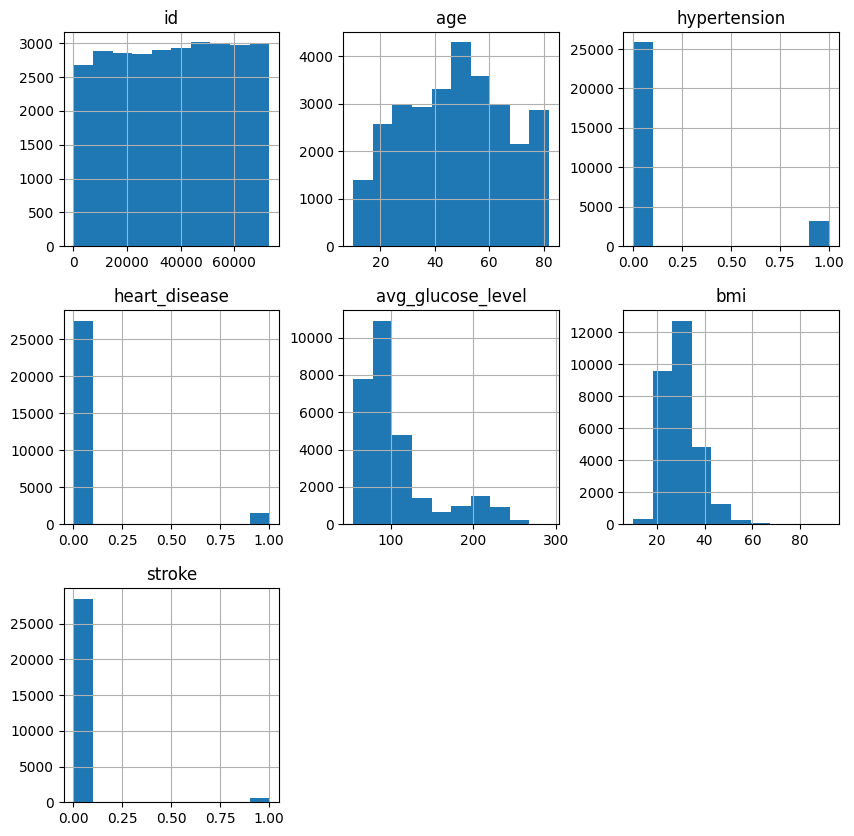

In [18]:
df.hist(figsize=(10, 10))
plt.show()

# Distribution of numerical columns with KDE

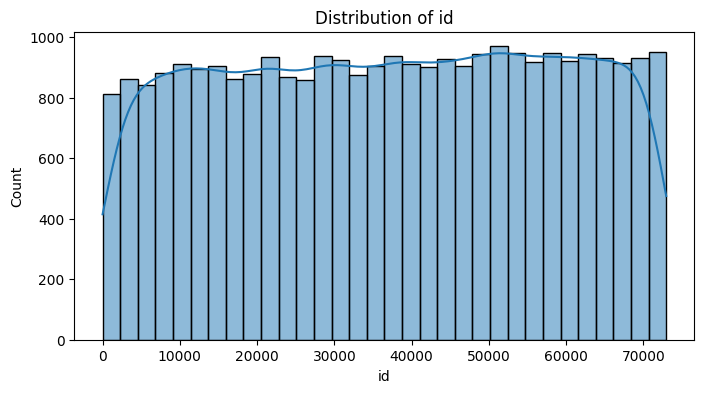

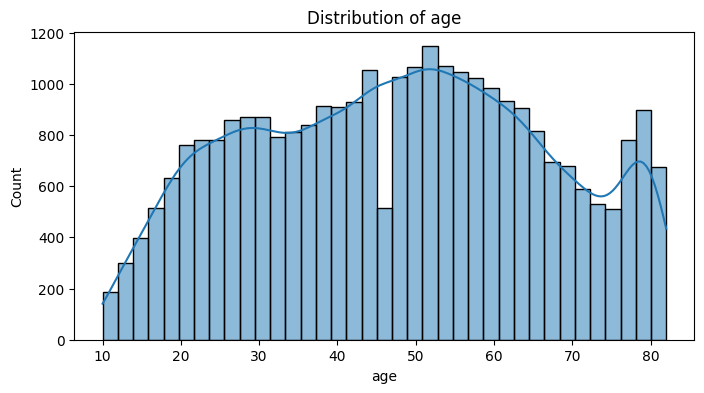

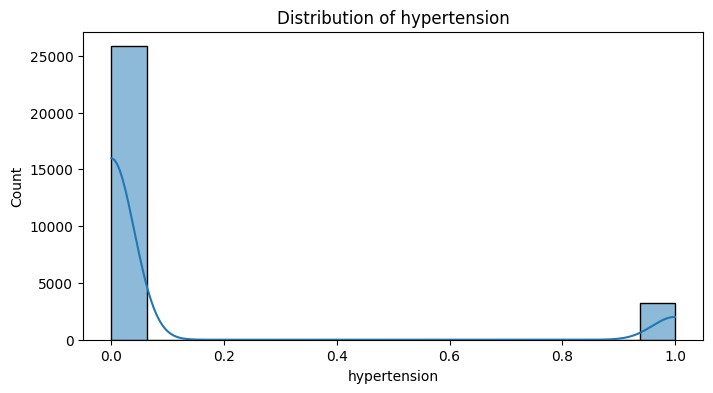

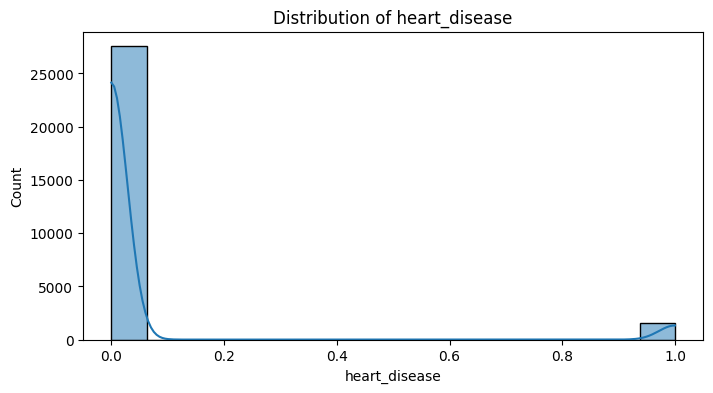

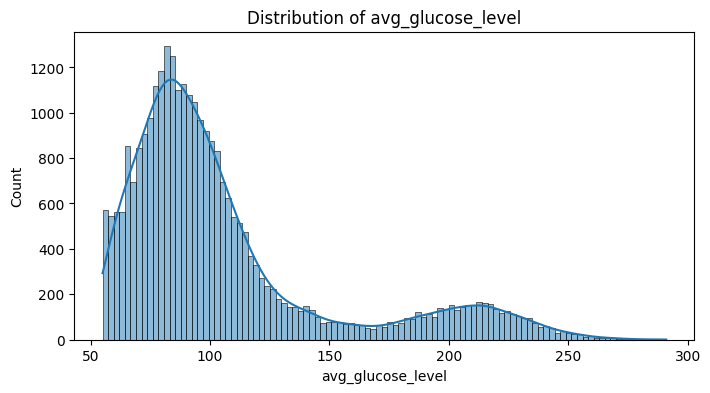

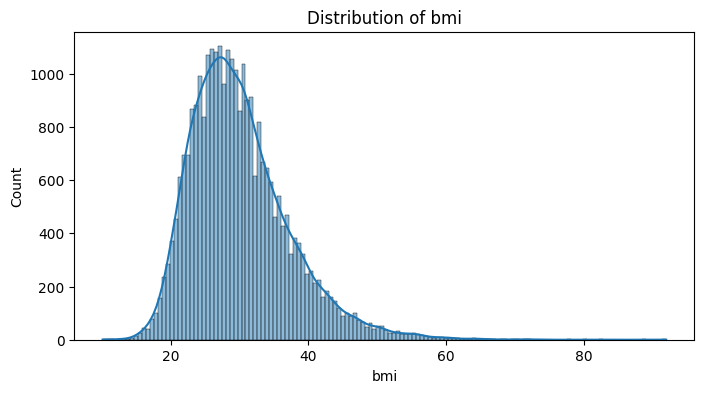

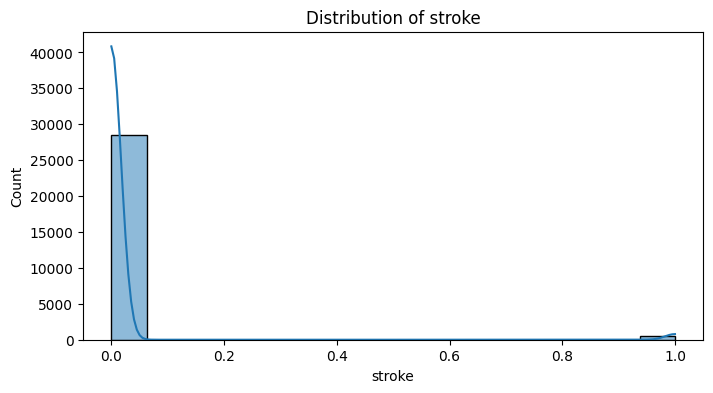

In [19]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical columns

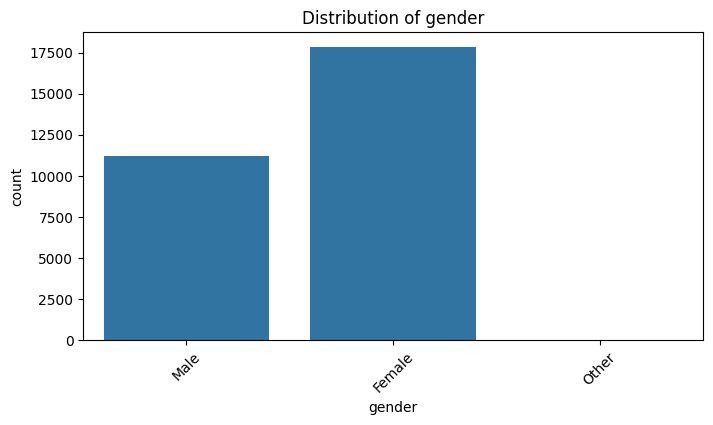

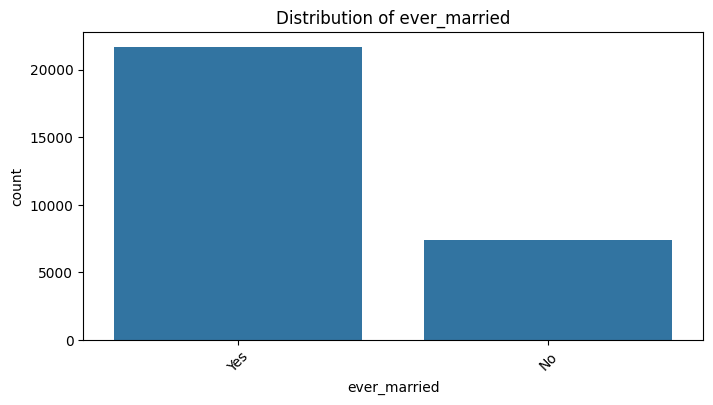

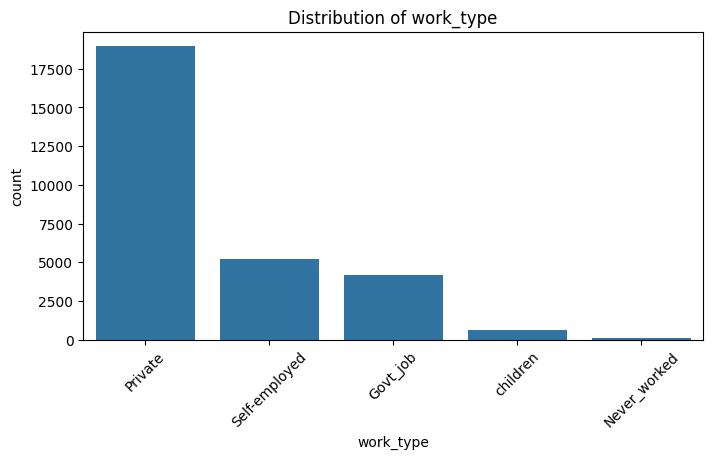

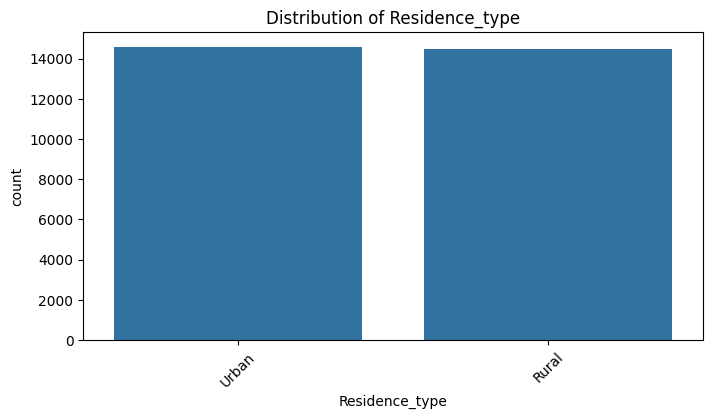

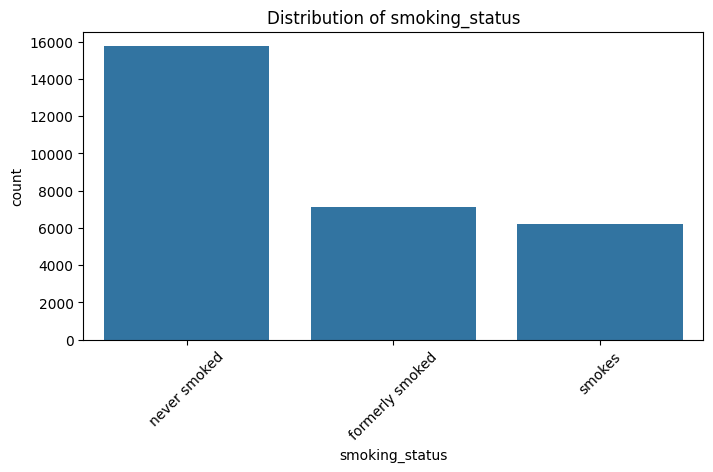

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Distribution of target variable 'stroke

<ipython-input-21-f44846530d4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


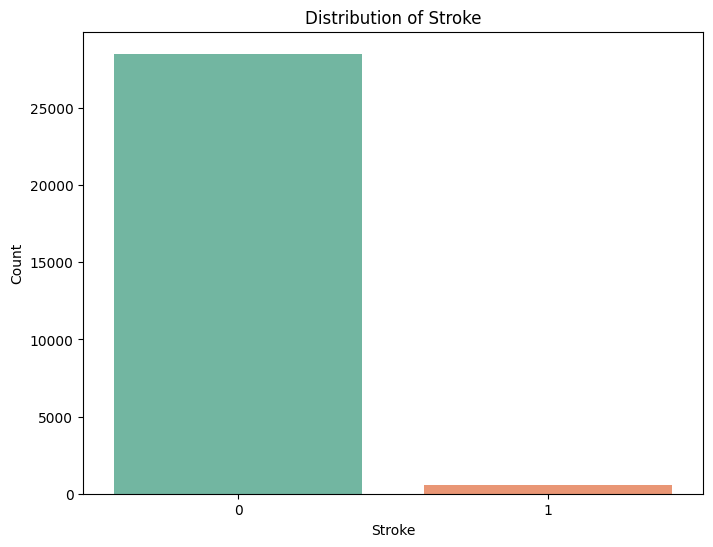

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

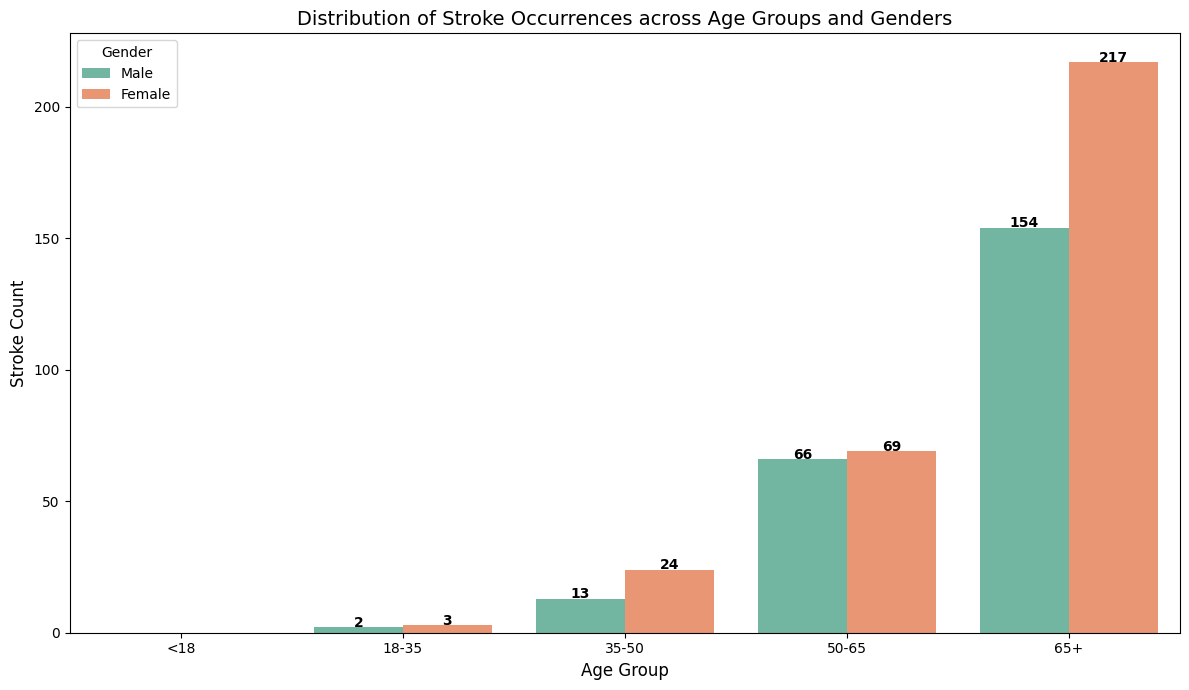

Plot with count labels generated successfully.


In [23]:
# Load the dataset
eda_data = df.copy()  # Create a copy of the original DataFrame 'df' and assign it to 'eda_data'
# Create age groups/bins. Adjust bins according to the available age range.
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
eda_data['age_group'] = pd.cut(eda_data['age'], bins=age_bins, labels=age_labels, right=False)

# Create age groups/bins. Adjust bins according to the available age range.
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
eda_data['age_group'] = pd.cut(eda_data['age'], bins=age_bins, labels=age_labels, right=False)

# Filter the dataframe to rows where stroke occurred
stroke_df = eda_data[eda_data['stroke'] == 1]

# Plot the distribution of stroke occurrences across age groups and genders
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=stroke_df, x='age_group', hue='gender', palette='Set2', order=age_labels)
plt.title('Distribution of Stroke Occurrences across Age Groups and Genders', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Stroke Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:  # Only add text if the bar exists and has height
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                int(height),
                ha="center", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Plot with count labels generated successfully.")


Average Glucose Levels by Work Type and Smoking Status:
smoking_status  formerly smoked  never smoked      smokes
work_type                                                
Govt_job             110.530455    106.338364  104.978653
Never_worked         116.894444     92.850588  122.901429
Private              108.882191    103.395346  104.701491
Self-employed        117.513756    110.244381  113.105941
children              90.059072     92.296693  102.961111


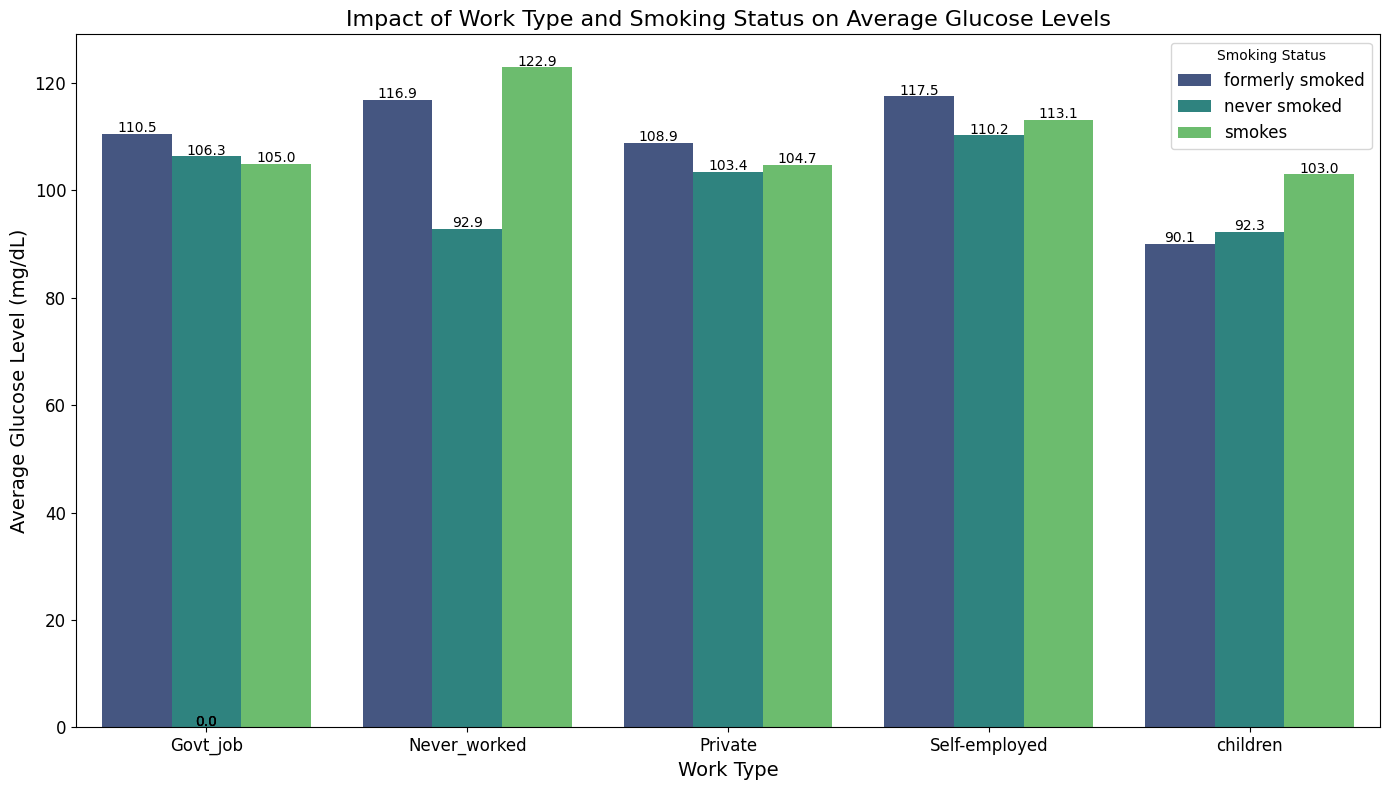

In [85]:
# Calculate average glucose levels by work_type and smoking_status
glucose_by_work_smoking = eda_data.groupby(['work_type', 'smoking_status'])['avg_glucose_level'].mean().reset_index()
# Create a pivot table for easier visualization
pivot_table = glucose_by_work_smoking.pivot(index='work_type', columns='smoking_status', values='avg_glucose_level')
print("\nAverage Glucose Levels by Work Type and Smoking Status:")
print(pivot_table)

# Visualize the data with a grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='work_type', y='avg_glucose_level', hue='smoking_status', data=glucose_by_work_smoking, palette='viridis')
plt.title('Impact of Work Type and Smoking Status on Average Glucose Levels', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Average Glucose Level (mg/dL)', fontsize=14)
plt.legend(title='Smoking Status', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.3, f'{height:.1f}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

#Stroke Probability by Smoking Status, BMI, and Glucose Levels

<ipython-input-53-1535363c9992>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_smoking_bmi_glucose = df.groupby(['smoking_status', 'bmi_bracket', 'glucose_bracket'])['stroke'].mean().reset_index()


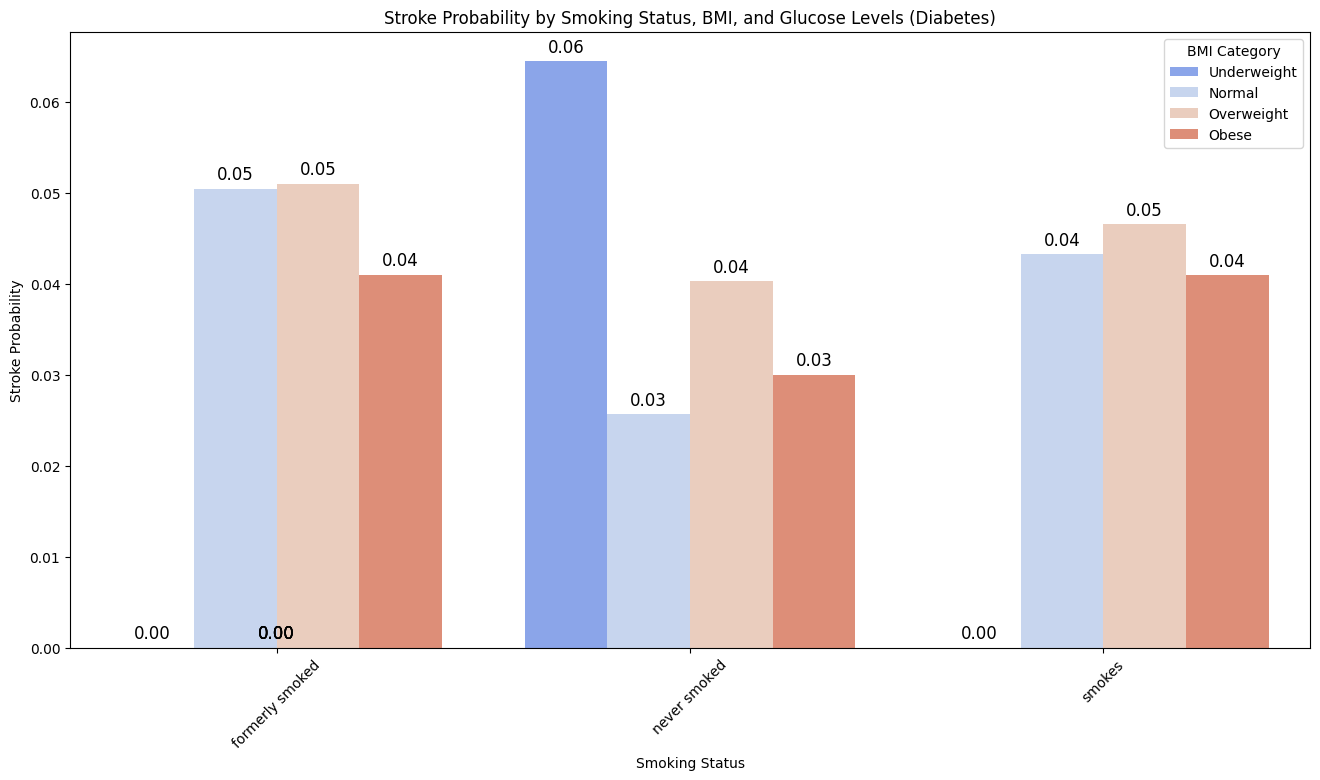

In [53]:
# Define BMI categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create 'bmi_bracket' column using pd.cut
df['bmi_bracket'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Define glucose level categories
glucose_bins = [0, 100, 125, 1000]  # Adjust bins if needed
glucose_labels = ['Normal', 'Prediabetes', 'Diabetes']

# Create 'glucose_bracket' column using pd.cut
df['glucose_bracket'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

# Grouping
stroke_by_smoking_bmi_glucose = df.groupby(['smoking_status', 'bmi_bracket', 'glucose_bracket'])['stroke'].mean().reset_index()

# **Fix Filtering Issue**: Use 'Diabetes' instead of '200+'
filtered_df = stroke_by_smoking_bmi_glucose[stroke_by_smoking_bmi_glucose['glucose_bracket'] == 'Diabetes']

# Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='smoking_status', y='stroke', hue='bmi_bracket', data=filtered_df, palette='coolwarm')

# Title and Labels
plt.title('Stroke Probability by Smoking Status, BMI, and Glucose Levels (Diabetes)')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Probability')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.legend(title='BMI Category')
plt.show()


#Correlation Matrix with Heatmap

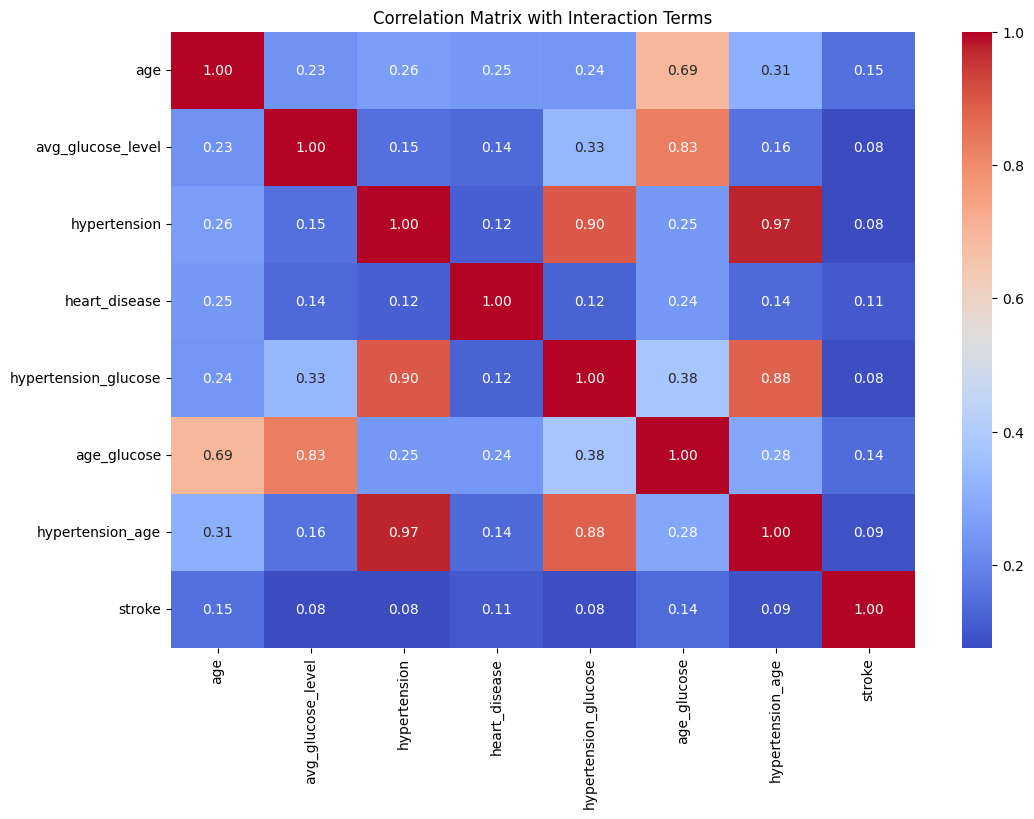

In [27]:
# Create interaction terms
df['hypertension_glucose'] = df['hypertension'] * df['avg_glucose_level']  # Change 'avg_glucose' to 'avg_glucose_level'
df['age_glucose'] = df['age'] * df['avg_glucose_level']  # Change 'avg_glucose' to 'avg_glucose_level'
df['hypertension_age'] = df['hypertension'] * df['age']

# Calculate correlation matrix
corr_matrix = df[['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'hypertension_glucose', 'age_glucose', 'hypertension_age', 'stroke']].corr() # Change 'avg_glucose' to 'avg_glucose_level' and remove 'hmi', 'dystroke' if they don't exist

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Interaction Terms')
plt.show()

# Principal Component Analysis (PCA)

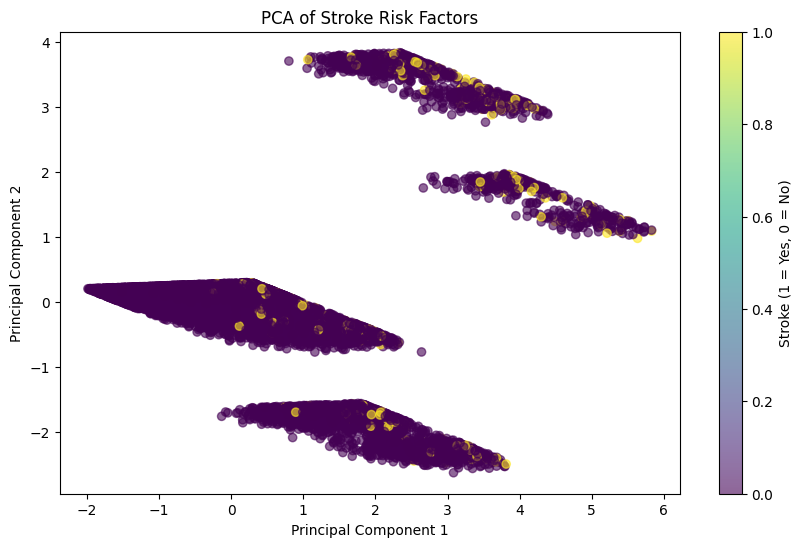

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
# Removed 'avg_glucose_k', 'hmi' and replaced with 'avg_glucose_level'
numerical_features = ['age', 'avg_glucose_level', 'hypertension', 'heart_disease']
X = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
# Assuming 'stroke' is the target variable, replace 'dystroke' with 'stroke'
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['stroke'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Stroke (1 = Yes, 0 = No)')
plt.title('PCA of Stroke Risk Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# K-Means Clustering

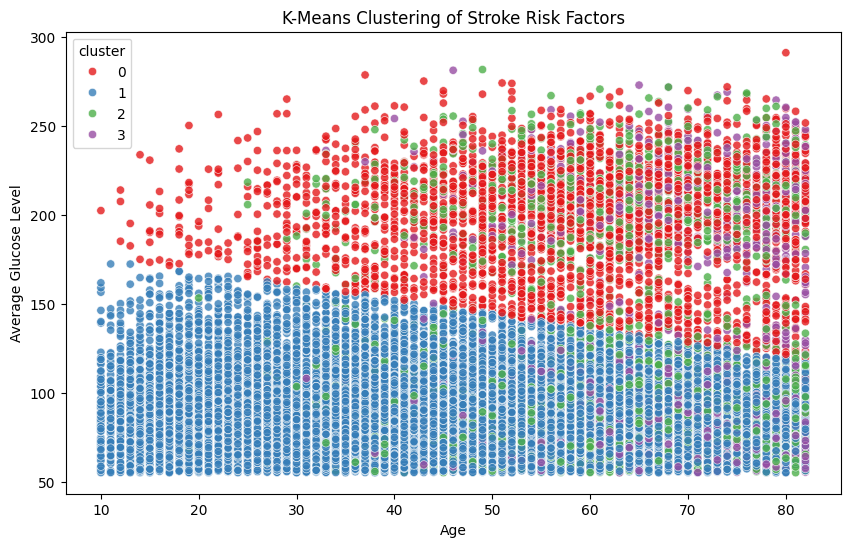

In [31]:
from sklearn.cluster import KMeans

# Select features for clustering
# Remove 'avg_glucose_k' and 'hmi' as they are not in the DataFrame
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']]  # Replace 'avg_glucose_k' with 'avg_glucose_level' if that's the intended feature

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level' in the scatterplot
sns.scatterplot(x='age', y='avg_glucose_level', hue='cluster', data=df, palette='Set1', alpha=0.8)
plt.title('K-Means Clustering of Stroke Risk Factors')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

#Decision Tree for Feature Importance

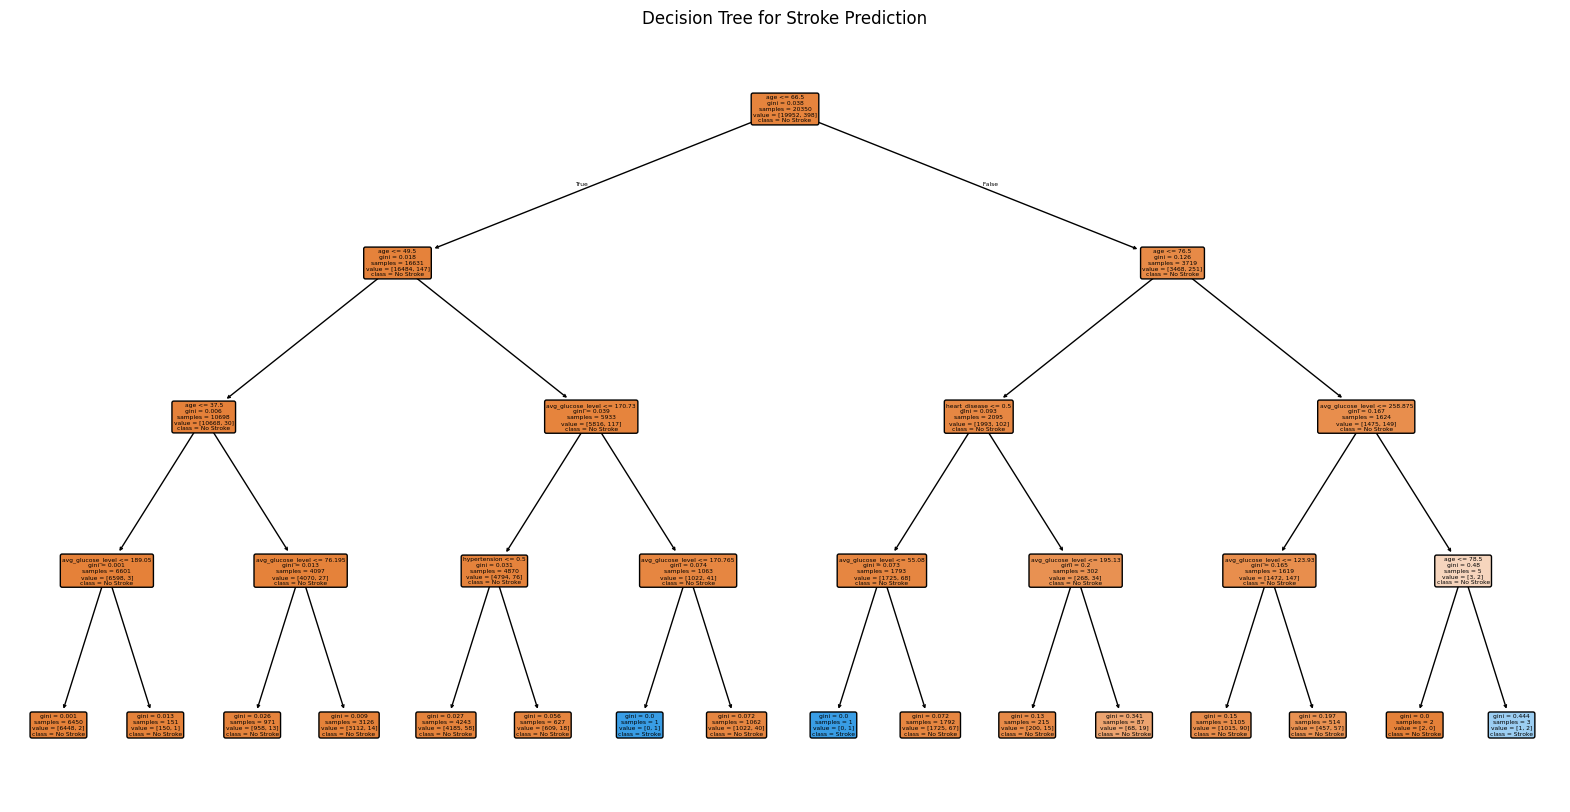

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

# Prepare data
# Replace incorrect column names with correct ones
X = df[['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'smoking_status', 'Residence_type']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
# If 'dystroke' is the correct target variable name, keep it as is. If it's a typo, change it to the correct name (e.g., 'stroke')
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.title('Decision Tree for Stroke Prediction')
plt.show()

#Random Forest for Feature Importance

<ipython-input-34-a9ab7531b556>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


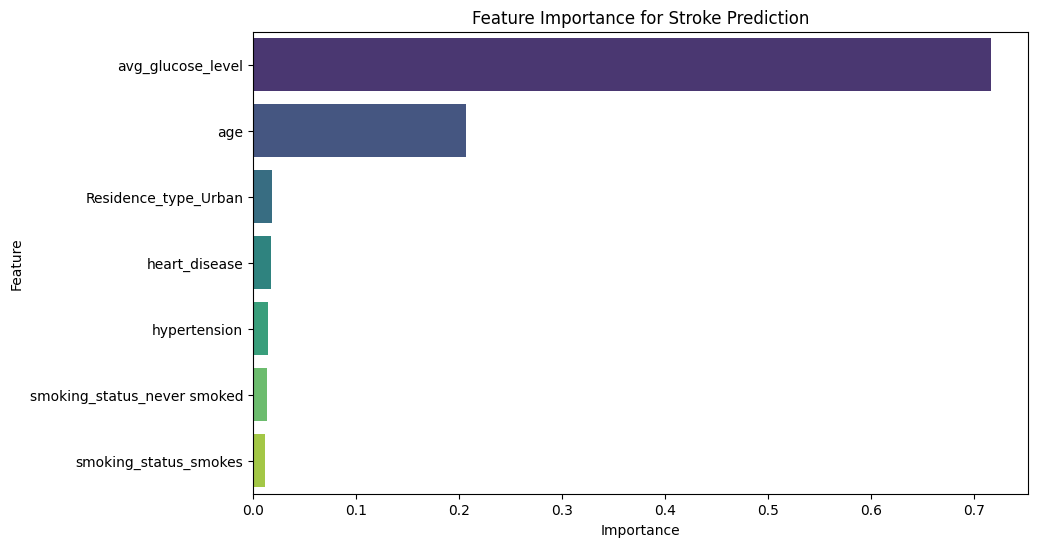

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Stroke Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#SHAP Values for Interpretable Machine Learning

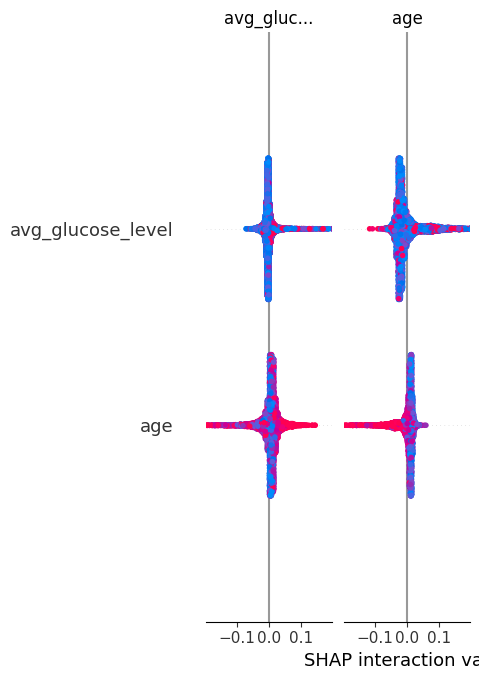

In [35]:
import shap

# Explain the model using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

#Partial Dependence Plots

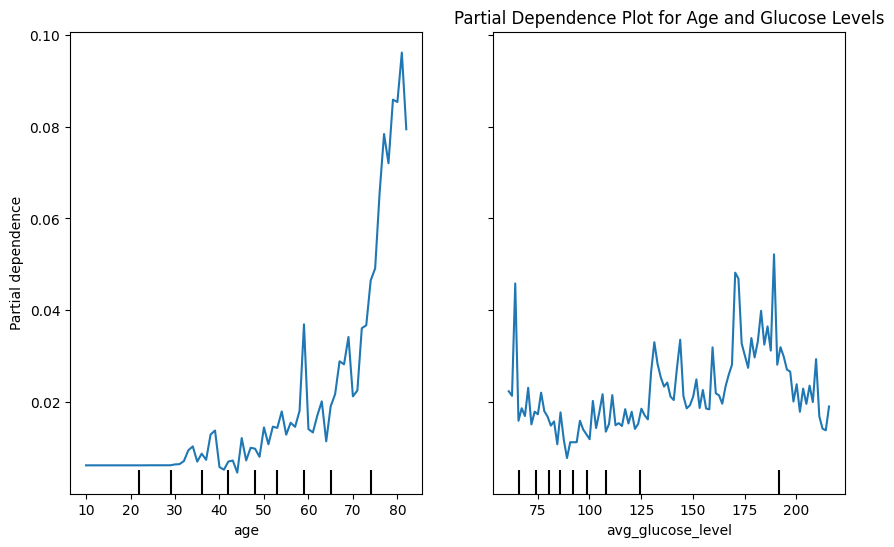

In [38]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for age and glucose levels
fig, ax = plt.subplots(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level' in the features list
PartialDependenceDisplay.from_estimator(rf, X_train, features=['age', 'avg_glucose_level'], ax=ax)
plt.title('Partial Dependence Plot for Age and Glucose Levels')
plt.show()

#Logistic Regression with Interaction Terms

In [41]:
import statsmodels.api as sm

# Create interaction terms using 'avg_glucose_level'
df['hypertension_glucose_interaction'] = df['hypertension'] * df['avg_glucose_level']

# Fit a logistic regression model with interaction terms
# Use 'avg_glucose_level' instead of 'avg_glucose_k'
X = df[['hypertension', 'avg_glucose_level', 'hypertension_glucose_interaction']]
X = sm.add_constant(X)  # Add intercept
# Assuming 'stroke' is the target variable, change 'dystroke' to 'stroke' if needed
y = df['stroke']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.089362
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                29072
Model:                          Logit   Df Residuals:                    29068
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                 0.04454
Time:                        01:16:14   Log-Likelihood:                -2597.9
converged:                       True   LL-Null:                       -2719.1
Covariance Type:            nonrobust   LLR p-value:                 3.132e-52
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.3141      0.126    -42.32

#DBSCAN Clustering

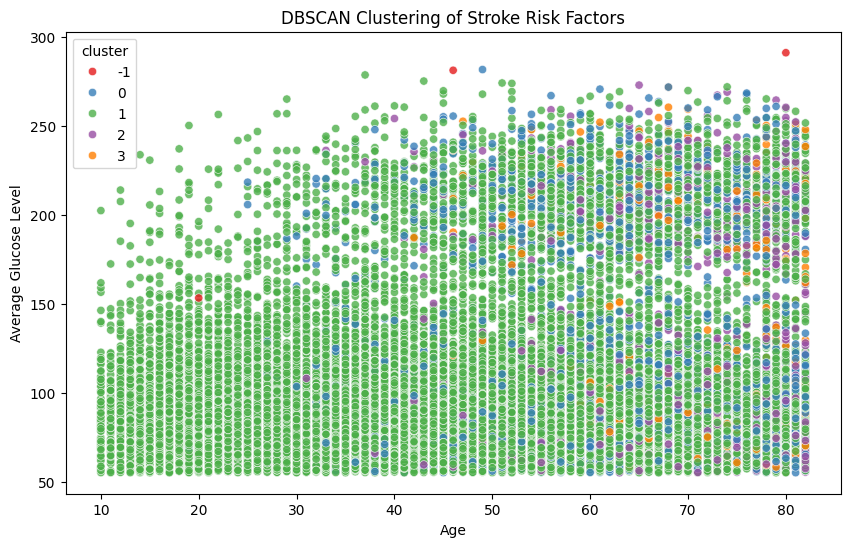

In [43]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
df['cluster'] = dbscan.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level'
sns.scatterplot(x='age', y='avg_glucose_level', hue='cluster', data=df, palette='Set1', alpha=0.8)
plt.title('DBSCAN Clustering of Stroke Risk Factors')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

#Logistic Regression with Polynomial Features

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_poly, y)

# Get coefficients
coefficients = pd.DataFrame({'Feature': poly.get_feature_names_out(X.columns), 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display top coefficients
print(coefficients.head(10))

                                              Feature  Coefficient
1                                        hypertension     0.583031
5                                  const hypertension     0.583031
8                                      hypertension^2     0.583031
11                                avg_glucose_level^2     0.000047
13                 hypertension_glucose_interaction^2    -0.000003
12  avg_glucose_level hypertension_glucose_interac...    -0.000003
7              const hypertension_glucose_interaction    -0.001094
9                      hypertension avg_glucose_level    -0.001094
10      hypertension hypertension_glucose_interaction    -0.001094
3                    hypertension_glucose_interaction    -0.001094


# Step 6: Correlation Analysis

#Handling Missing Valus

#Check Missing Values

In [107]:
# Function to calculate missing values percentage
def calculate_missing_values(data):
    # Calculate the percentage of missing values for each column
    missing_values = data.isnull().sum() / len(data) * 100
    return missing_values

# Function to print missing values information
def print_missing_values_info(missing_values, data):
    print("Missing Values Percentage:")
    print(missing_values)
    print("\nDetailed Missing Values:")
    print("# Missing values in variable 'bmi': {:.2f}%".format(missing_values['bmi']))
    print("# Missing values in variable 'smoking_status': {:.2f}%".format(missing_values['smoking_status']))
    print("Data shape: {}".format(data.shape))

# Main function to handle missing values
def handle_missing_values(data):
    # Calculate missing values
    missing_values = calculate_missing_values(data)

    # Print missing values information
    print_missing_values_info(missing_values, data)

    # Return the missing values for further use if needed
    return missing_values

# Example usage
if __name__ == "__main__":
    # Assuming 'df' is your DataFrame # Changed 'data' to 'df'
    missing_values = handle_missing_values(df) # Changed 'data' to 'df'

Missing Values Percentage:
id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.368664
smoking_status       30.626728
stroke                0.000000
dtype: float64

Detailed Missing Values:
# Missing values in variable 'bmi': 3.37%
# Missing values in variable 'smoking_status': 30.63%
Data shape: (43400, 12)


#Handling Missing Values

In [113]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming 'df' is your original DataFrame
# Create a copy of the DataFrame to avoid modifying the original
clean_data = df.copy()

# Drop rows with any missing values
clean_data.dropna(inplace=True)

# Create imputers for different strategies
bmi_imputer = SimpleImputer(strategy='mean')  # Impute 'bmi' with mean
smoking_imputer = SimpleImputer(strategy='most_frequent')  # Impute 'smoking_status' with mode

# Fit and transform the imputers on the respective columns
clean_data['bmi'] = bmi_imputer.fit_transform(clean_data[['bmi']])[:, 0]  # Get the first (and only) column of the 2D array
clean_data['smoking_status'] = smoking_imputer.fit_transform(clean_data[['smoking_status']])[:, 0]  # Get the first (and only) column of the 2D array


# Drop the 'id' column if needed
clean_data.drop(columns='id', axis=1, inplace=True)

# Validate that there are no more missing values
miss_val = clean_data.isnull().sum() / len(clean_data) * 100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (29072, 11)


### Changing Category to Numerical Values

#Feature Encoding:

In [115]:
# Display unique values in categorical columns
print(f"Unique 'gender'          : {df['gender'].unique()}")
print(f"Unique 'ever_married'    : {df['ever_married'].unique()}")
print(f"Unique 'work_type'       : {df['work_type'].unique()}")
print(f"Unique 'Residence_type'  : {df['Residence_type'].unique()}")
print(f"Unique 'smoking_status'  : {df['smoking_status'].unique()}")

Unique 'gender'          : ['Male' 'Female' 'Other']
Unique 'ever_married'    : ['No' 'Yes']
Unique 'work_type'       : ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Unique 'Residence_type'  : ['Rural' 'Urban']
Unique 'smoking_status'  : [nan 'never smoked' 'formerly smoked' 'smokes']


In [116]:
from sklearn.preprocessing import LabelEncoder

# Assuming clean_data is already created
# Initialize LabelEncoders for each categorical variable
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_work = LabelEncoder()
le_residence = LabelEncoder()
le_smoking = LabelEncoder()

# Apply encoding with handling of NaN values by converting to string first
clean_data['gender'] = le_gender.fit_transform(clean_data['gender'].astype(str))
clean_data['ever_married'] = le_married.fit_transform(clean_data['ever_married'].astype(str))
clean_data['work_type'] = le_work.fit_transform(clean_data['work_type'].astype(str))
clean_data['Residence_type'] = le_residence.fit_transform(clean_data['Residence_type'].astype(str))
clean_data['smoking_status'] = le_smoking.fit_transform(clean_data['smoking_status'].astype(str))

# Display the first few rows with modified printing options
with pd.option_context('expand_frame_repr', False, 'display.max_columns', None):
    print("\nFirst 5 rows of encoded data:")
    print(clean_data.head())

# Optional: Print the mapping of original categories to encoded values
print("\nCategory mappings:")
print("Gender:", dict(zip(le_gender.classes_, range(len(le_gender.classes_)))))
print("Ever Married:", dict(zip(le_married.classes_, range(len(le_married.classes_)))))
print("Work Type:", dict(zip(le_work.classes_, range(len(le_work.classes_)))))
print("Residence Type:", dict(zip(le_residence.classes_, range(len(le_residence.classes_)))))
print("Smoking Status:", dict(zip(le_smoking.classes_, range(len(le_smoking.classes_)))))


First 5 rows of encoded data:
   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke
1       1  58.0             1              0             1          2               1              87.96  39.2               1       0
3       0  70.0             0              0             1          2               0              69.04  35.9               0       0
6       0  52.0             0              0             1          2               1              77.59  17.7               0       0
7       0  75.0             0              1             1          3               0             243.53  27.0               1       0
8       0  32.0             0              0             1          2               0              77.67  32.3               2       0

Category mappings:
Gender: {'0': 0, '1': 1, '2': 2}
Ever Married: {'0': 0, '1': 1}
Work Type: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4}
Residence Type: {'0': 0

### Inter-feature Correlation

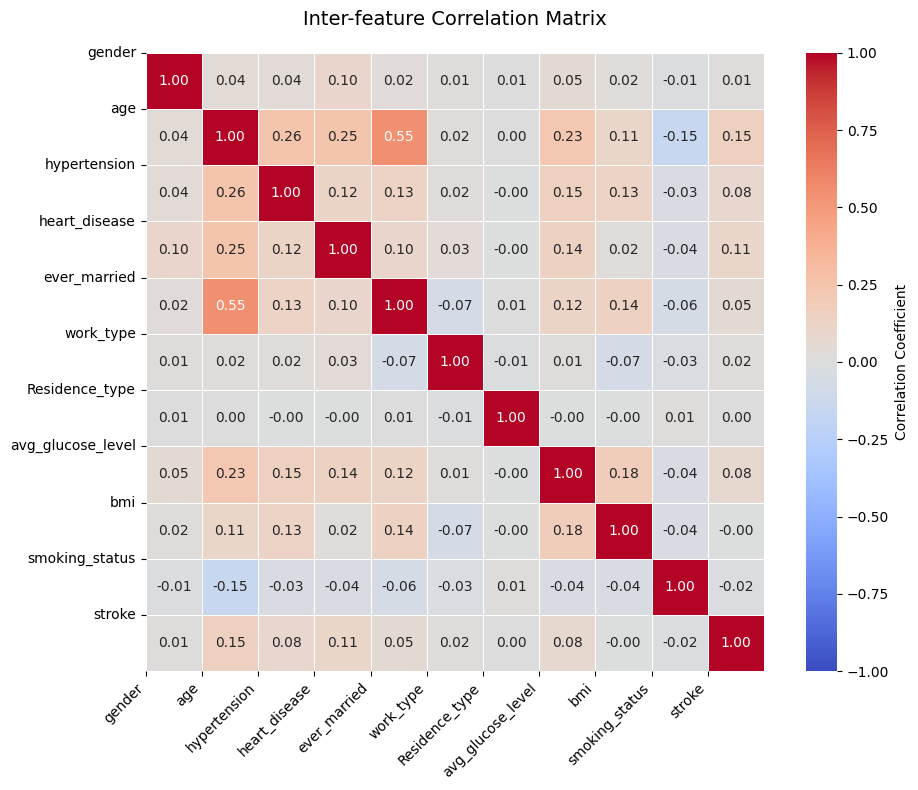

In [117]:
# Calculate correlation matrix
corr_matrix = clean_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Slightly larger figure size
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    cmap='coolwarm',      # Use a diverging color scheme
    center=0,            # Center the colormap at 0
    vmin=-1,             # Minimum correlation value
    vmax=1,              # Maximum correlation value
    fmt='.2f',           # Format annotation with 2 decimal places
    square=True,         # Make the plot square-shaped
    linewidths=0.5,      # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}  # Customize colorbar
)

# Customize the plot
plt.title('Inter-feature Correlation Matrix', pad=20, fontsize=14)
plt.xticks(
    range(len(clean_data.columns)),
    clean_data.columns,
    rotation=45,
    ha='right',  # Right-align rotated labels
    fontsize=10
)
plt.yticks(
    range(len(clean_data.columns)),
    clean_data.columns,
    rotation=0,
    fontsize=10
)

# Adjust layout and display
plt.tight_layout()
plt.show()

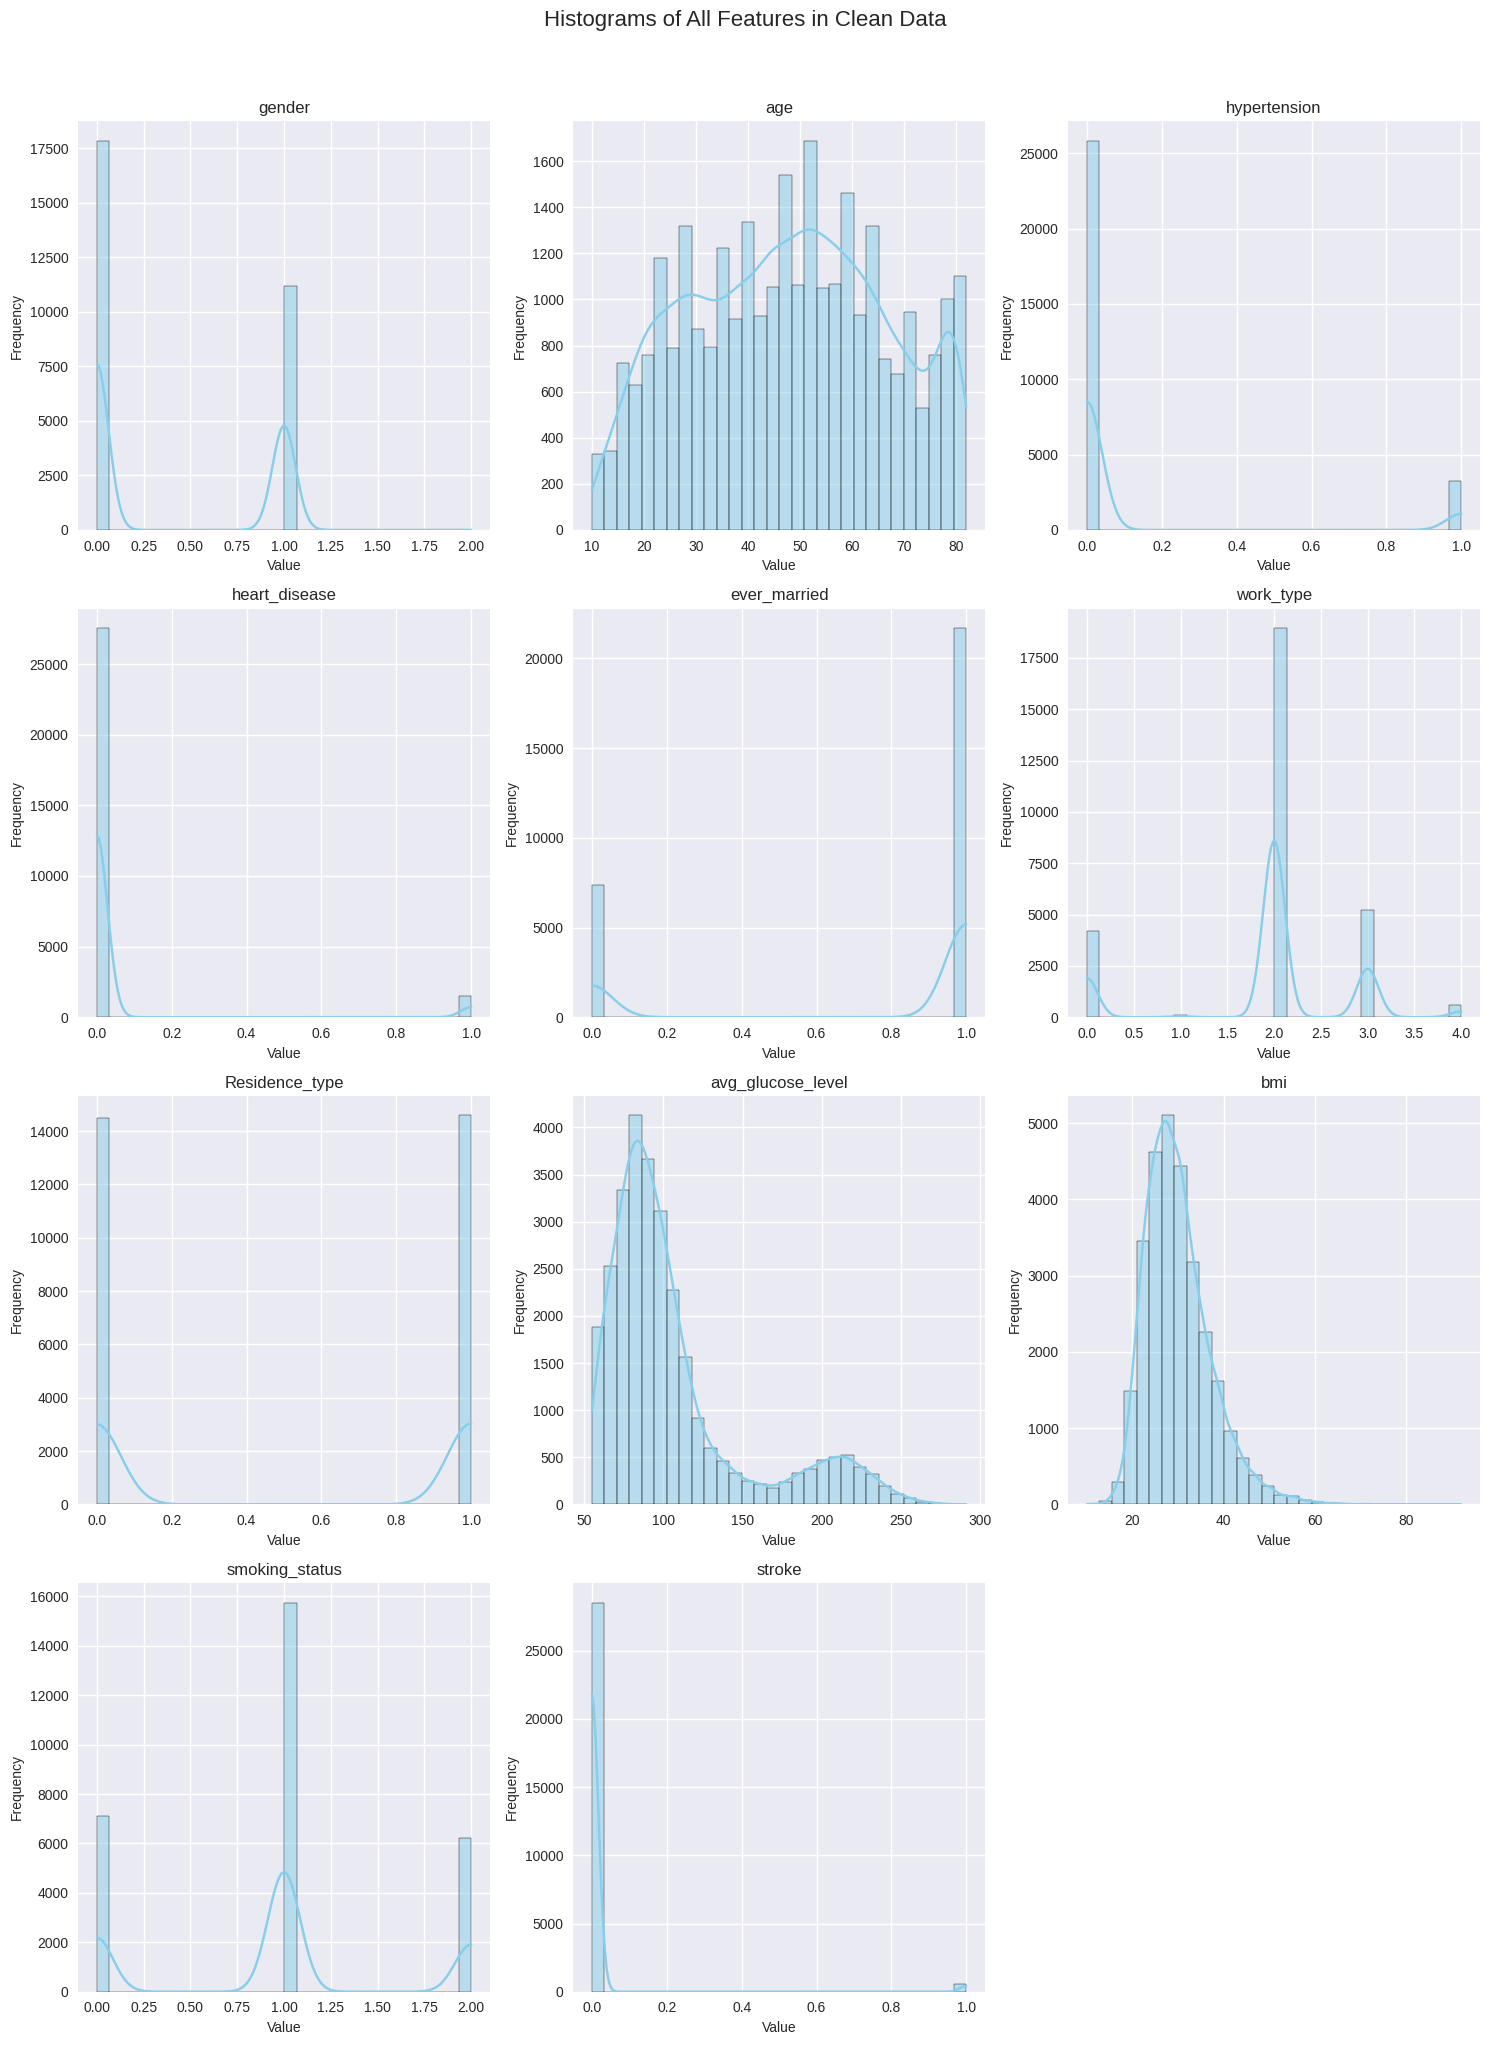

In [118]:
# Assuming clean_data is your DataFrame
# Set style for better visualization
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')  # Modern Seaborn style

# Number of features
n_features = len(clean_data.columns)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required rows

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Histograms of All Features in Clean Data', fontsize=16, y=1.02)

# Flatten axes array for easier iteration (in case of multiple rows)
axes = axes.flatten()

# Iterate through each column and create histogram
for idx, column in enumerate(clean_data.columns):
    # Select the current axis
    ax = axes[idx]

    # Create histogram with KDE (kernel density estimate)
    sns.histplot(
        data=clean_data[column],
        bins=30,           # Number of bins
        kde=True,         # Add density curve
        color='skyblue',  # Bar color
        edgecolor='black',# Bar edge color
        ax=ax
    )

    # Customize each subplot
    ax.set_title(f'{column}', fontsize=12)
    ax.set_xlabel('Value' if clean_data[column].dtype in ['int64', 'float64'] else 'Category', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Rotate x-axis labels for categorical variables
    if clean_data[column].dtype not in ['int64', 'float64']:
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Class (Target) Distribution
Now, let's take a look at the distribution of class (target). If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

Class Distribution (Counts):
stroke
0    28524
1      548
Name: count, dtype: int64

Class Distribution (Percentages):
stroke
0    98.12
1     1.88
Name: proportion, dtype: float64


<ipython-input-119-3e751b4a48bd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=clean_data, ax=ax1, palette='Set2')


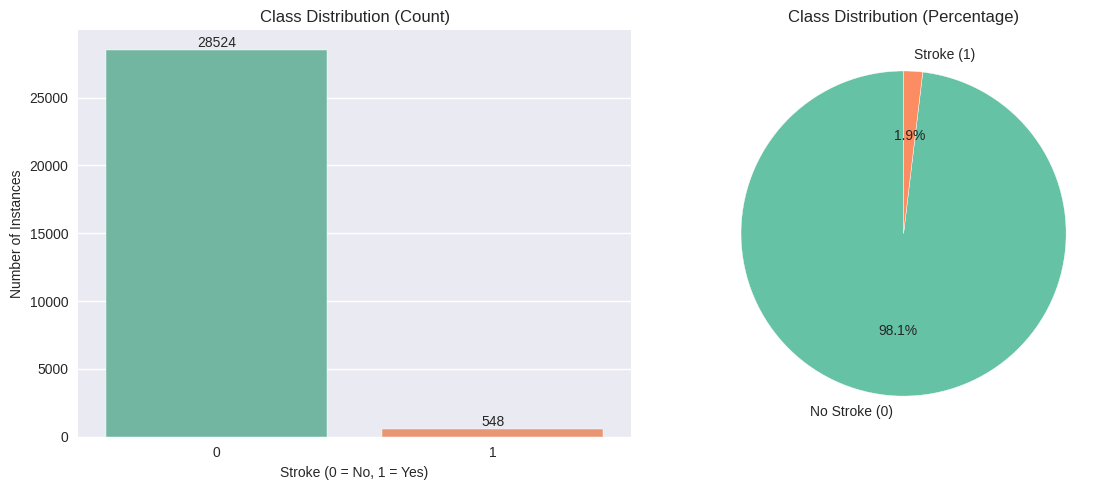


Imbalance Ratio (No Stroke / Stroke): 52.05


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming clean_data is your DataFrame with 'stroke' as the target
# Set visualization style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

# Calculate class distribution
class_counts = clean_data['stroke'].value_counts()
class_percentages = clean_data['stroke'].value_counts(normalize=True) * 100

# Print class distribution
print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages.round(2))

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.countplot(x='stroke', data=clean_data, ax=ax1, palette='Set2')
ax1.set_title('Class Distribution (Count)', fontsize=12)
ax1.set_xlabel('Stroke (0 = No, 1 = Yes)', fontsize=10)
ax1.set_ylabel('Number of Instances', fontsize=10)
for p in ax1.patches:  # Add count labels on bars
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Pie chart
ax2.pie(class_counts,
        labels=['No Stroke (0)', 'Stroke (1)'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=90)
ax2.set_title('Class Distribution (Percentage)', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Check for imbalance
imbalance_ratio = class_counts[0] / class_counts[1] if class_counts[1] != 0 else float('inf')
print(f"\nImbalance Ratio (No Stroke / Stroke): {imbalance_ratio:.2f}")

# Basic imbalance assessment
if imbalance_ratio > 10:
    print("Warning: Highly imbalanced dataset detected. Consider handling imbalance.")
elif imbalance_ratio > 3:
    print("Note: Moderately imbalanced dataset. May benefit from imbalance handling.")
else:
    print("Class distribution appears relatively balanced.")

## Data Preprocessing

In [120]:
import pandas as pd
from imblearn.over_sampling import ADASYN

# Create ADASYN object with sampling strategy for minority class
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the data
X, y = adasyn.fit_resample(
    clean_data.loc[:, clean_data.columns != 'stroke'],
    clean_data['stroke']
)

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

# Optional: Convert X back to DataFrame and check distribution
X_df = pd.DataFrame(X, columns=clean_data.columns.drop('stroke'))
print("\nNew class distribution:")
print(pd.Series(y).value_counts())

Shape of X: (57136, 10)
Shape of y: (57136,)

New class distribution:
stroke
1    28612
0    28524
Name: count, dtype: int64


Class Distribution (Counts):
stroke
1    28612
0    28524
Name: count, dtype: int64

Class Distribution (Percentages):
stroke
1    50.08
0    49.92
Name: proportion, dtype: float64


<ipython-input-121-03f6bd42079c>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_series, ax=ax1, palette='Pastel1')


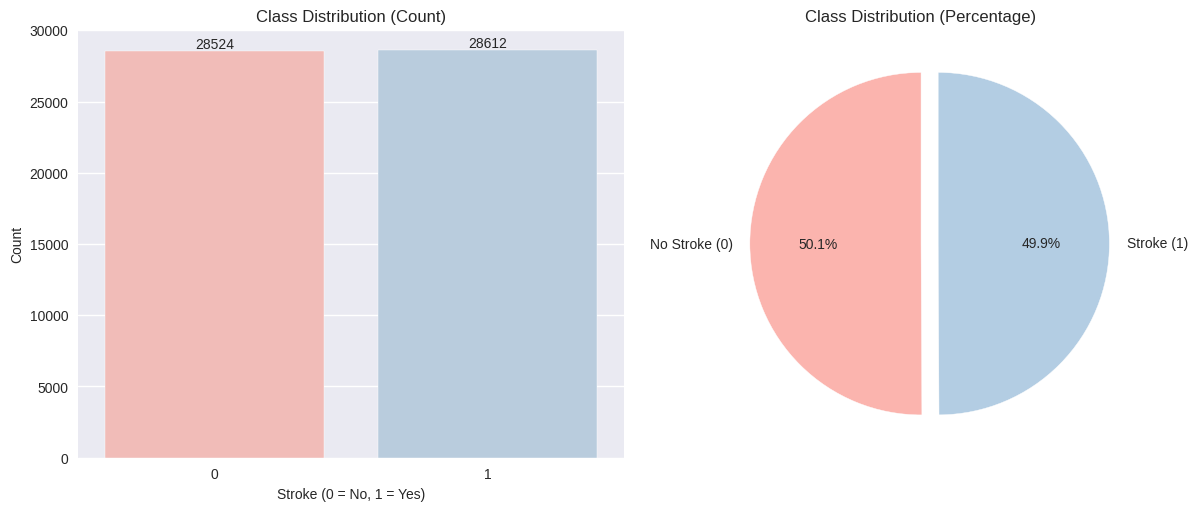

Imbalance Ratio (No Stroke / Stroke): 1.00


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your resampled data from ADASYN
# If you're checking original clean_data instead, replace y with clean_data['stroke']

# Convert y to Series if it's not already (from ADASYN output)
y_series = pd.Series(y, name='stroke')

# Calculate class distribution
class_counts = y_series.value_counts()
class_percentages = y_series.value_counts(normalize=True) * 100

# Print distribution
print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages.round(2))

# Set visualization style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Bar plot
sns.countplot(x=y_series, ax=ax1, palette='Pastel1')
ax1.set_title('Class Distribution (Count)', fontsize=12)
ax1.set_xlabel('Stroke (0 = No, 1 = Yes)', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

# Pie chart
ax2.pie(class_counts,
        labels=['No Stroke (0)', 'Stroke (1)'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Pastel1'),
        startangle=90,
        explode=(0, 0.1))  # Slightly separate the minority class
ax2.set_title('Class Distribution (Percentage)', fontsize=12)

# Display the plot
plt.show()

# Calculate and print imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1] if class_counts[1] != 0 else float('inf')
print(f"Imbalance Ratio (No Stroke / Stroke): {imbalance_ratio:.2f}")

### Data Splitting

In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X and y are from your ADASYN resampling
# Convert X to DataFrame if it's not already (for clarity)
X_df = pd.DataFrame(X, columns=clean_data.columns.drop('stroke'))
y_series = pd.Series(y, name='stroke')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_df,              # Features
    y_series,          # Target
    test_size=0.2,     # 20% for testing
    train_size=0.8,    # 80% for training
    random_state=42,   # For reproducibility
    stratify=y_series  # Maintain class distribution in split
)

# Print shapes of resulting sets
print("Data Split Summary:")
print(f"Original data shape: {X_df.shape}")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

# Verify class distribution in train and test sets
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True).round(2) * 100)
print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True).round(2) * 100)

# Optional: Reset indices for cleanliness
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Data Split Summary:
Original data shape: (57136, 10)
Training set shape (X_train): (45708, 10)
Testing set shape (X_test): (11428, 10)
Training target shape (y_train): (45708,)
Testing target shape (y_test): (11428,)

Class Distribution in Training Set:
stroke
1    50.0
0    50.0
Name: proportion, dtype: float64

Class Distribution in Testing Set:
stroke
1    50.0
0    50.0
Name: proportion, dtype: float64


### Data Normalisation

In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are from your previous split
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the same scaler (fitted on training data only)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for convenience
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print basic statistics to verify scaling
print("Training Set Statistics After Scaling:")
print(X_train_scaled_df.describe().round(2))
print("\nTesting Set Statistics After Scaling:")
print(X_test_scaled_df.describe().round(2))

# Optional: Check a few rows
print("\nFirst 5 rows of scaled training data:")
print(X_train_scaled_df.head())

Training Set Statistics After Scaling:
         gender       age  hypertension  heart_disease  ever_married  \
count  45708.00  45708.00      45708.00       45708.00      45708.00   
mean       0.00      0.00          0.00           0.00         -0.00   
std        1.00      1.00          1.00           1.00          1.00   
min       -0.65     -2.56         -0.33          -0.24         -1.89   
25%       -0.65     -0.67         -0.33          -0.24          0.53   
50%       -0.65      0.15         -0.33          -0.24          0.53   
75%        1.53      0.90         -0.33          -0.24          0.53   
max        3.72      1.29          3.07           4.11          0.53   

       work_type  Residence_type  avg_glucose_level       bmi  smoking_status  
count   45708.00        45708.00           45708.00  45708.00        45708.00  
mean       -0.00           -0.00               0.00     -0.00           -0.00  
std         1.00            1.00               1.00      1.00           

## ML Model Training and Evaluation
We will implement and benchmark the performance of the following 7 ML algorithms:
1. Singular Vector Machine (SVM)
2. Gaussian Naive Bayes (GNB)
3. Logistic Regression (LR)
4. Decision Tree (DT)
5. Random Forest (RF)
6. LightGBM (LGBM)
7. XGboost (XGB)
8. Catboost (CAT)

### Performance Metrics

The peformance will be evaluated based on two different groups of metrics:
1. Sensitivity, specificity,area under the curve (AUC),ROC Curve
2. Precision, recall, and F1 score

SVM - Group 1 Metrics:
Sensitivity (Recall): 0.8826
Specificity: 0.7884
AUC: 0.9171


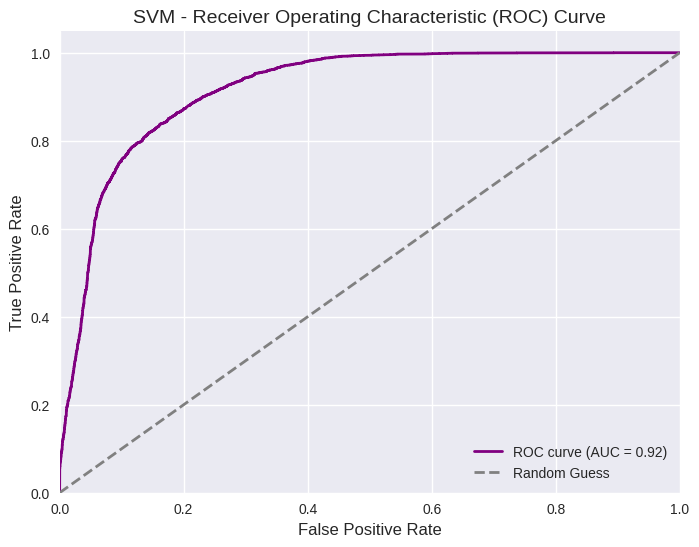


SVM - Group 2 Metrics:
Precision: 0.8071
Recall: 0.8826
F1 Score: 0.8432


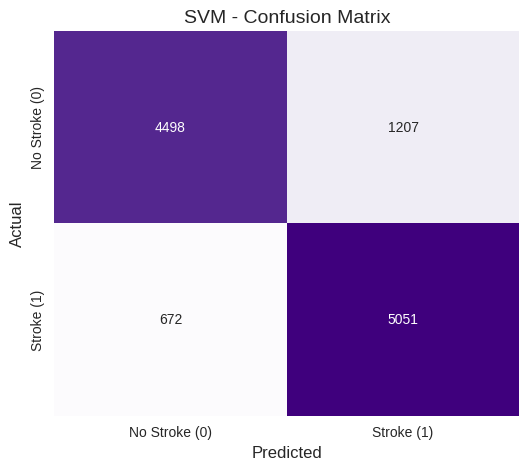

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score
)
import seaborn as sns
import numpy as np

# Train SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  # RBF kernel, enable probabilities
svm_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = svm_model.predict(X_test_scaled_df)
y_prob = svm_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("SVM - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('SVM - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nSVM - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('SVM - Confusion Matrix', fontsize=14)
plt.show()

# #Random Forest

Random Forest - Group 1 Metrics:
Sensitivity (Recall): 0.9836
Specificity: 0.9662
AUC: 0.9966


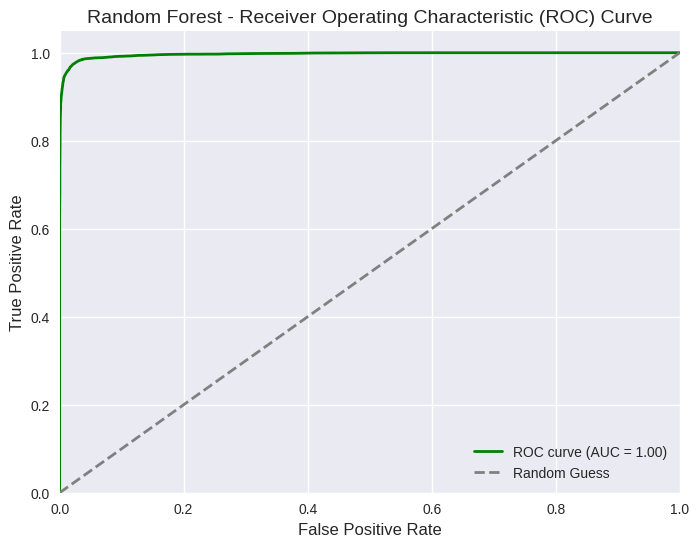


Random Forest - Group 2 Metrics:
Precision: 0.9668
Recall: 0.9836
F1 Score: 0.9751


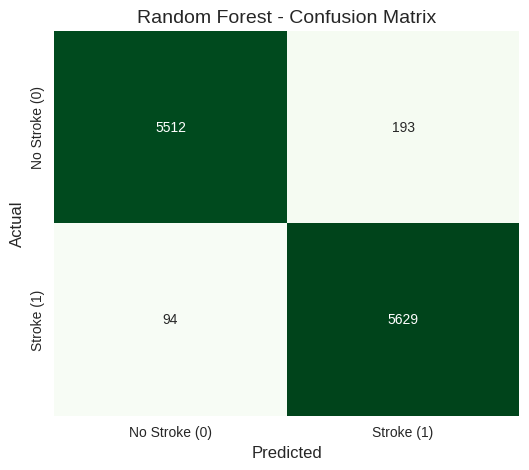


Feature Importance:
             Feature  Importance
1                age    0.427569
7  avg_glucose_level    0.207301
8                bmi    0.143500
9     smoking_status    0.056964
5          work_type    0.051042
6     Residence_type    0.041977
0             gender    0.029191
4       ever_married    0.017525
2       hypertension    0.015935
3      heart_disease    0.008996


In [125]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = rf_model.predict(X_test_scaled_df)
y_prob = rf_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("Random Forest - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nRandom Forest - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

LightGBM - Group 1 Metrics:
Sensitivity (Recall): 0.9591
Specificity: 0.9476
AUC: 0.9910


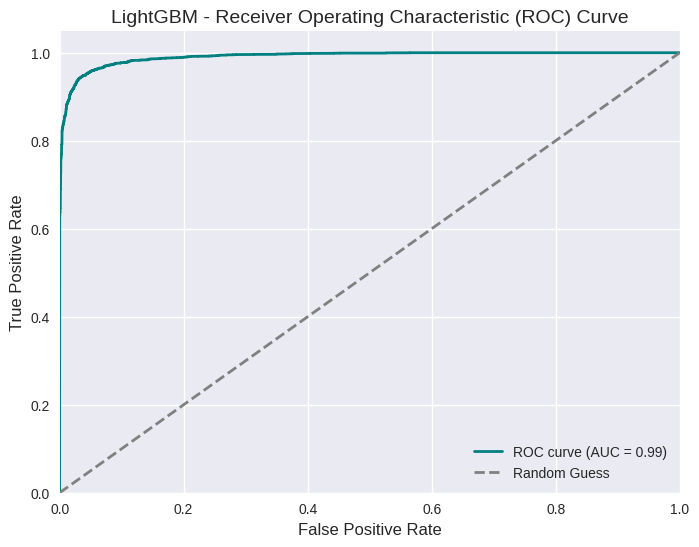


LightGBM - Group 2 Metrics:
Precision: 0.9483
Recall: 0.9591
F1 Score: 0.9537


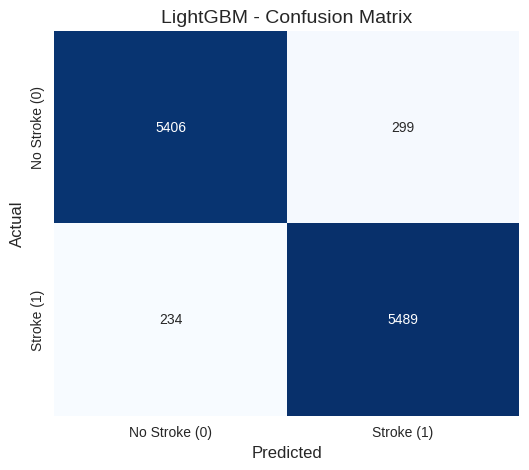


Feature Importance:
             Feature  Importance
1                age        1416
7  avg_glucose_level         654
8                bmi         408
5          work_type         152
9     smoking_status         103
4       ever_married          65
6     Residence_type          65
0             gender          64
2       hypertension          49
3      heart_disease          24


In [127]:
import lightgbm as lgb
# Train LightGBM model
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,      # Number of boosting iterations
    learning_rate=0.1,     # Step size
    random_state=42,       # For reproducibility
    verbose=-1             # Suppress training output
)
lgbm_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = lgbm_model.predict(X_test_scaled_df)
y_prob = lgbm_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("LightGBM - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('LightGBM - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nLightGBM - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('LightGBM - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)